<a href="https://colab.research.google.com/github/CheayeonLee/ESAA_OB/blob/main/11%EC%A3%BC%EC%B0%A8%EA%B3%BC%EC%A0%9C(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 03. 케라스

## 01. 딥러닝 준비

### 1-1 주요 용어

### 1-1-1 하이퍼파라미터(hyper-parameter)

- 하이퍼파라미터: 딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주어야 하는 설정값

### 1-1-2 과소적합 vs. 과대적합(undefitting vs. overfitting)

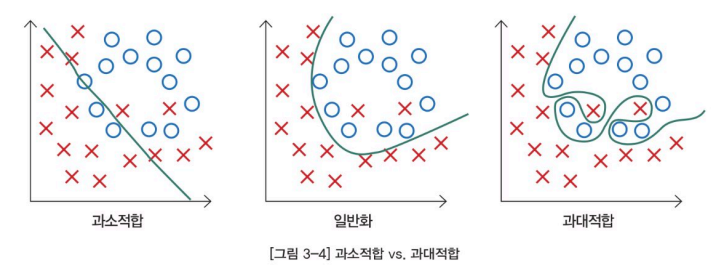

### 1-1-3 에포크(epoch)

- 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프를 1 epoch라고

### 1-1-4 손실함수(loss function)

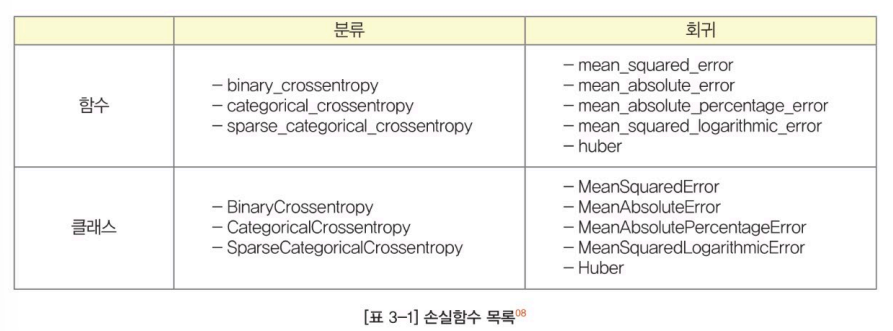


In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

### 1-1-5 경사하강법(gradient descent)

- 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법
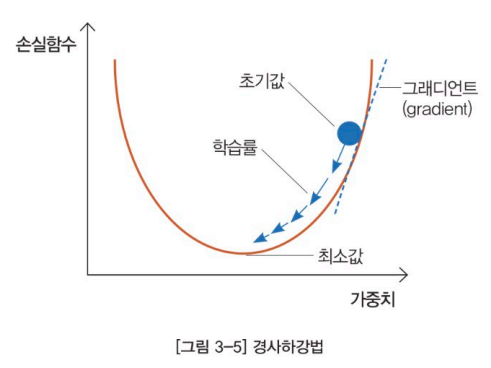

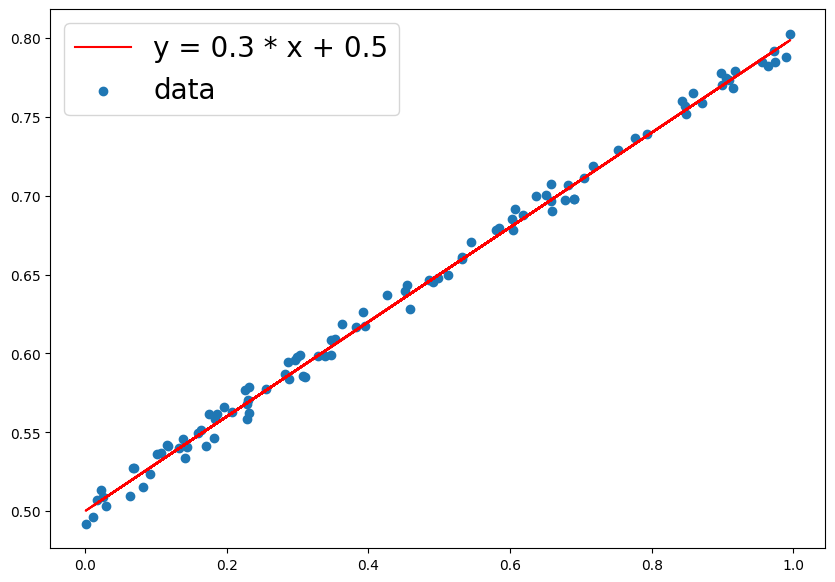

w:0.3, b:0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.):
  x = np.random.rand(size)
  y = w*x+b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w} * x + {b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [3]:
# 넘파이로 최적화하는 과정 구현
# 최대 반복 횟수
num_epoch=1000

# 학습률(learning_rate)
learning_rate=0.005

# 에서 기록
errors=[]

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.,high=1.)
b = np.random.uniform(low=0.,high=1.)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w*x+b

  # Loss Function 정의
  error = 0.5 * ((y_hat - y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w-learning_rate*((y_hat - y)*x).sum()
  b = b-learning_rate*(y_hat - y).sum()

  errors.append(error)

  if epoch % 5 ==0 :
    print("{0:2}w = {1:.5f}, b={2:.5f}error = {3:.5f}".format(epoch, w, b, error))

print("---------" * 15)
print("{0:2}w = {1:.1f}, b={2:.1f}error = {3:.5f}".format(epoch, w, b, error))

 0w = 0.63188, b=0.39677error = 1.44277
 5w = 0.55872, b=0.37700error = 0.31895
10w = 0.51544, b=0.39730error = 0.22203
15w = 0.47952, b=0.41457error = 0.15476
20w = 0.44959, b=0.42896error = 0.10803
25w = 0.42465, b=0.44096error = 0.07557
30w = 0.40386, b=0.45096error = 0.05302
35w = 0.38653, b=0.45929error = 0.03735
40w = 0.37209, b=0.46624error = 0.02647
45w = 0.36005, b=0.47203error = 0.01892
50w = 0.35002, b=0.47685error = 0.01366
55w = 0.34165, b=0.48087error = 0.01002
60w = 0.33468, b=0.48422error = 0.00748
65w = 0.32888, b=0.48702error = 0.00572
---------------------------------------------------------------------------------------------------------------------------------------
68w = 0.3, b=0.5error = 0.00494


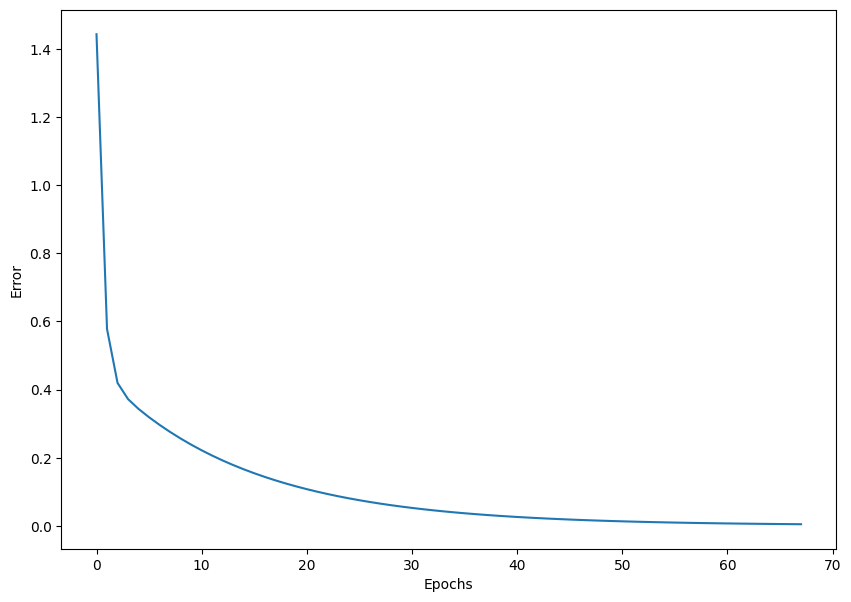

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2 딥러닝 프로세스

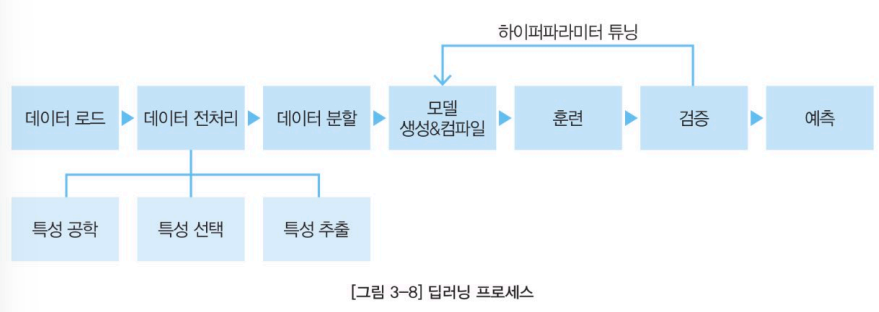

### 1-2-1 데이터 전처리

### 1-2-2 모델 생성

1. 순차적인 구조 모델(Sequential API)
2. 다중 입력 및 출력을 가지고 복잡한 구조 갖는 모델(Functional API / Model Subclassing)

### 1-2-3 모델 컴파일
- 속성 값 설정

### 1-2-4 모델 훈련

### 1-2-5 모델 검증
- 모델의 예측 값을 정답과 비교하여 평가지표 계산

### 1-2-6 모델 예측

## 02. 단순 신경망 훈련

### 2-1 선형회귀

- 회귀분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법

### 2-2 뉴런(Neuron)

- 뉴런은 인공 신경망 모델을 구성하는 하나의 신경
- 뉴런=노드

### 2-3 Dense 레이어

- 심층 신경망 모델을 구성하는 가장 기본 레이어
- 모든 뉴런이 서로 연결되어있으므로 '완전 연결층'이라고 부름
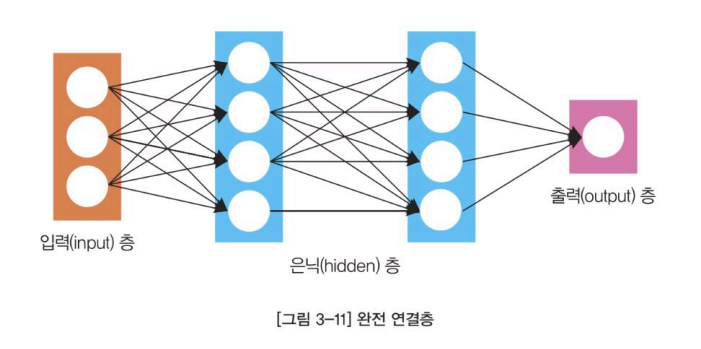

In [5]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4 데이터셋 만들기

In [6]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


- 지도학습: supervised learning으로, 정답이 있는 데이터를 활용해 데이터를 학습

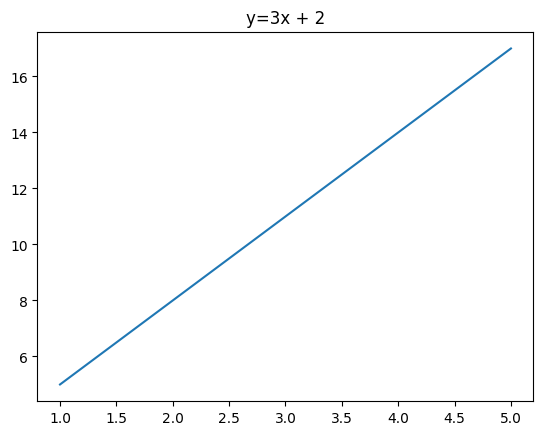

In [7]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y=3x + 2')
plt.show()

### 2-5 Sequential API

### 2-5-1 모델 구조

In [8]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [9]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2 입력 데이터 형태

- 반드시 첫 번째 층은 input_shape 매개변수를 지정해야 함

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

### 2-5-3 단순선형회귀 모델 정의

In [11]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### 2-6 모델 요약

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 컴파일
- 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 그리고 평가지표 등을 정의

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [14]:
# 짧은 문자열 지정
model.compile(optimizer='sgd',loss='mse',metrics=['mse','mae'])

In [16]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

In [17]:
# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

### 2-8 훈련

In [18]:
model.fit(x,y,epochs=5) # 5회 반복훈련

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 305.7446 - mae: 16.1611
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 178.2038 - mae: 12.3624
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 103.8790 - mae: 9.4625
Epoch 4/5
1/1 [==============================] - 0s 20ms/step - loss: 60.5660 - mae: 7.2487
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 35.3252 - mae: 5.5586


In [22]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

# 훈련
history=model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 638ms/step - loss: 90.5207 - mae: 8.9349
Epoch 2/1200
1/1 [==============================] - 0s 21ms/step - loss: 52.8702 - mae: 6.8706
Epoch 3/1200
1/1 [==============================] - 0s 25ms/step - loss: 30.9285 - mae: 5.2945
Epoch 4/1200
1/1 [==============================] - 0s 9ms/step - loss: 18.1411 - mae: 4.0912
Epoch 5/1200
1/1 [==============================] - 0s 18ms/step - loss: 10.6885 - mae: 3.1724
Epoch 6/1200
1/1 [==============================] - 0s 18ms/step - loss: 6.3447 - mae: 2.4709
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 3.8126 - mae: 1.9352
Epoch 8/1200
1/1 [==============================] - 0s 20ms/step - loss: 2.3362 - mae: 1.5261
Epoch 9/1200
1/1 [==============================] - 0s 19ms/step - loss: 1.4751 - mae: 1.2136
Epoch 10/1200
1/1 [==============================] - 0s 19ms/step - loss: 0.9725 - mae: 0.9749
Epoch 11/1200
1/1 [==============================] - 0

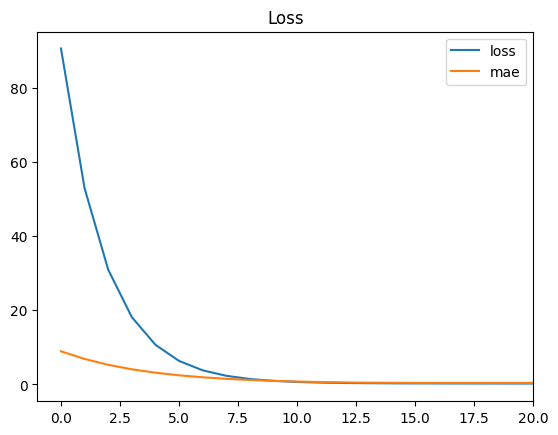

In [23]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9 검증

In [24]:
model.evaluate(x,y)

1/1 [==============================] - 0s 272ms/step - loss: 8.5671e-05 - mae: 0.0079


[8.5671097622253e-05, 0.007944488897919655]

1200번 epoch를 종료한 상태에서 출력된 값과 같다

### 2-10 예측

In [25]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 162ms/step


array([[32.0384]], dtype=float32)

y=3x+2였고 x=10일 때 y=32임을 감안한다면 정답이 꽤 근사한 값을 예측한 것을 확인할 수 있음

## 03. 심층 신경망으로 이미지 분류

### 3-1 케라스 내장 데이터셋 로드

In [26]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

넘파이 배열로 구성되어있음

In [27]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [28]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


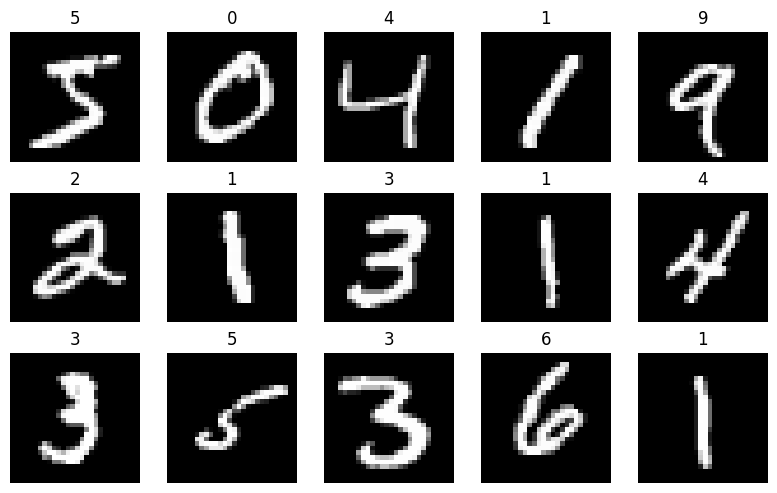

In [29]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2 데이터 전처리

In [30]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [31]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값:{x_train.min()}, 최대값:{x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값:{x_train.min()}, 최대값:{x_train.max()}')

정규화 전] 최소값:0, 최대값:255
정규화 후] 최소값:0.0, 최대값:1.0


In [32]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [33]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3 Flatten 레이어
- 데이터 처리하기 쉽게 3D->1D

In [34]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [35]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4 활성화 함수
- 입력을 비선형 출력으로 변환해주는 함수

In [36]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [37]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax')
])

- 출력층 노드 개수가 2개 이상: softmax
- 이진 분류: sigmoid

In [40]:
# 출력층 노드 = 1인 경우.sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(1, activation='softmax')

### 3-6 손실함수

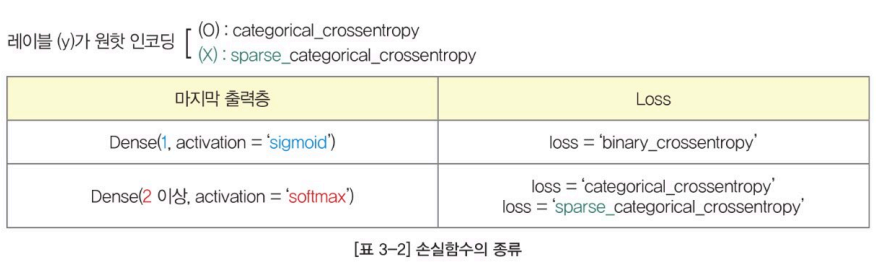

In [41]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [42]:
# y가 원핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저
- 손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법

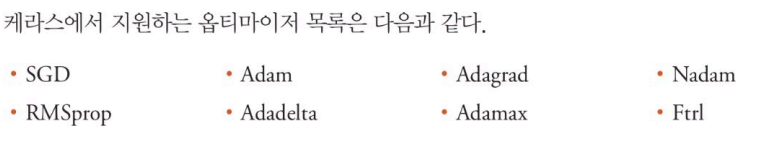

In [43]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3-8 평가지표

In [44]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [45]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9 훈련

In [46]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2274 - accuracy: 0.9318 - val_loss: 0.1231 - val_accuracy: 0.9614
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0936 - accuracy: 0.9709 - val_loss: 0.0850 - val_accuracy: 0.9730
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0658 - accuracy: 0.9794 - val_loss: 0.0735 - val_accuracy: 0.9763
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0492 - accuracy: 0.9842 - val_loss: 0.0732 - val_accuracy: 0.9771
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0398 - accuracy: 0.9874 - val_loss: 0.0789 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.1184 - val_accuracy: 0.9666
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.0976 -

### 3-10 평가

In [47]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0954 - accuracy: 0.9767
검증 셋 정확도: 0.9767000079154968


### 3-11 예측

In [48]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [49]:
# 예측 결과 출력
predictions[0]

array([9.4575381e-12, 2.9806428e-09, 1.9759478e-09, 3.1677214e-08,
       4.4437822e-08, 6.5946853e-12, 9.5918964e-16, 9.9998623e-01,
       1.7939742e-09, 1.3755863e-05], dtype=float32)

In [50]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


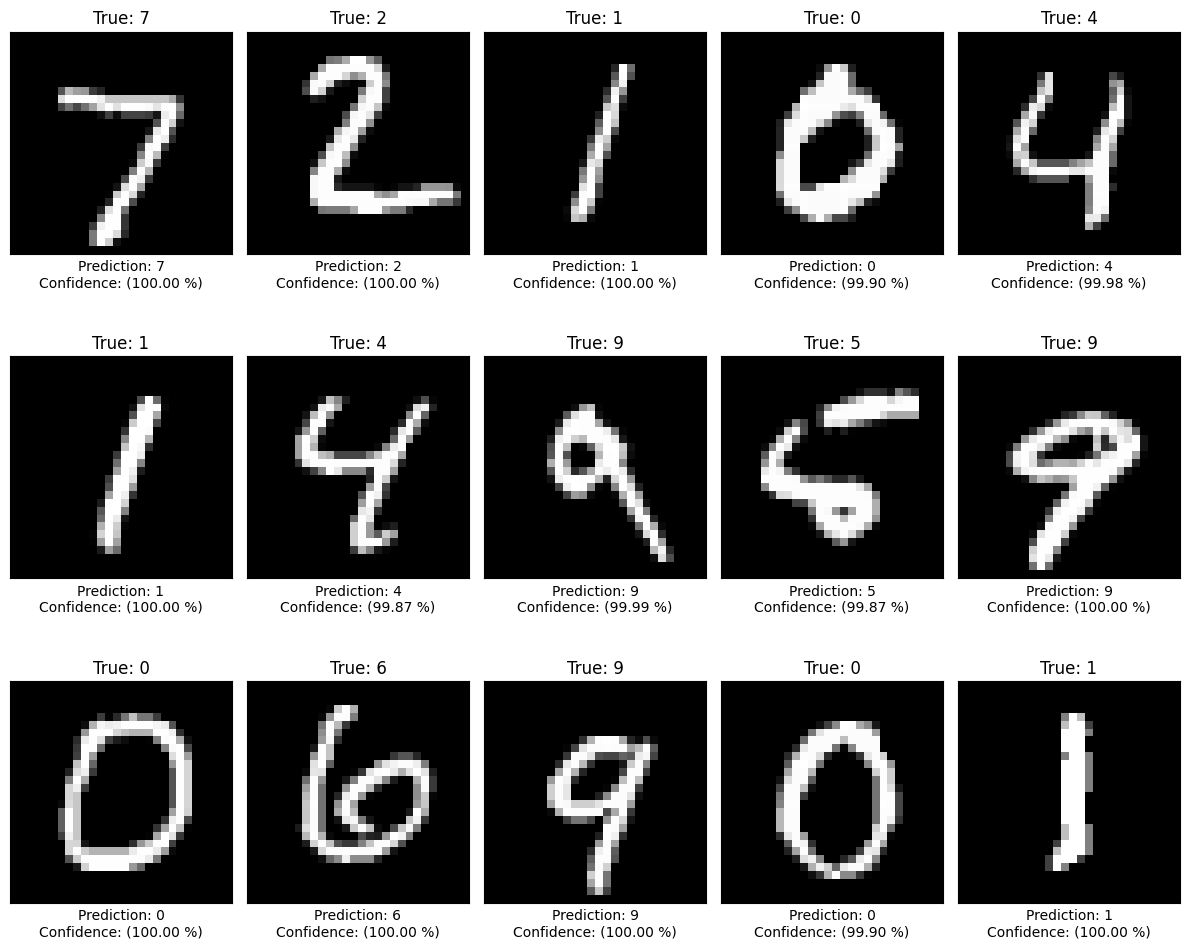

In [52]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()